In [1]:
%config Completer.use_jedi = False
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
import sys

In [2]:
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
# Loading data to the game variable
games = pd.read_csv("games.csv")

In [4]:
games

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81307,184441,boardgameexpansion,Micro Rome: Aegyptus,2015.0,1.0,1.0,0.0,30.0,0.0,10.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81308,184442,boardgame,Trivial Pursuit: Marvel Cinematic Universe Da...,2013.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81309,184443,boardgame,BEARanoia,2015.0,2.0,15.0,1.0,1.0,1.0,0.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81310,184449,boardgame,Freight,2015.0,2.0,4.0,60.0,30.0,60.0,8.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000


### Before start applying machine learning concepts we need to preprocess the data
> 1) First of all we will see the data and then try to detect the bad data and then we will remove them from database

In [5]:
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


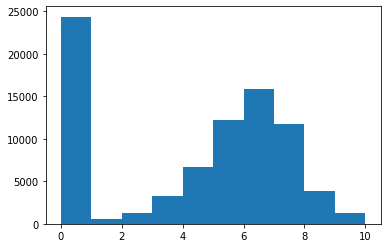

In [6]:
# Histogram visualization of average_rating
plt.hist(games['average_rating'])
plt.show()

### In the games dataset there so many examples without ratings 
> we need to remove them, therefor we will just print an see these 'average rating' = 0 data

In [7]:
print(games[games['average_rating'] == 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                  0.0
minplayers                     0.0
maxplayers                     0.0
playingtime                    0.0
minplaytime                    0.0
maxplaytime                    0.0
minage                         0.0
users_rated                      0
average_rating                 0.0
bayes_average_rating           0.0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                 0.0
Name: 13048, dtype: object


> Lets remove the 'average rating' == 0 data
<br> Other than that we need to remove rows with NaN or NaT values
<br><b> dropna will remove the rows with NaN values

In [8]:
games = games[games['average_rating'] > 0]
games = games.dropna()

### Lets plot and see the dataset

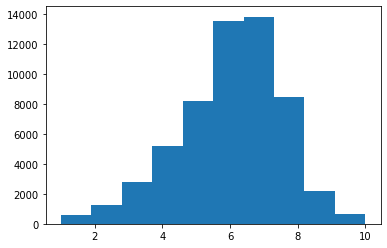

In [9]:
plt.hist(games['average_rating'])
plt.show()

> Wow you can see that the dataset is free from 0 values

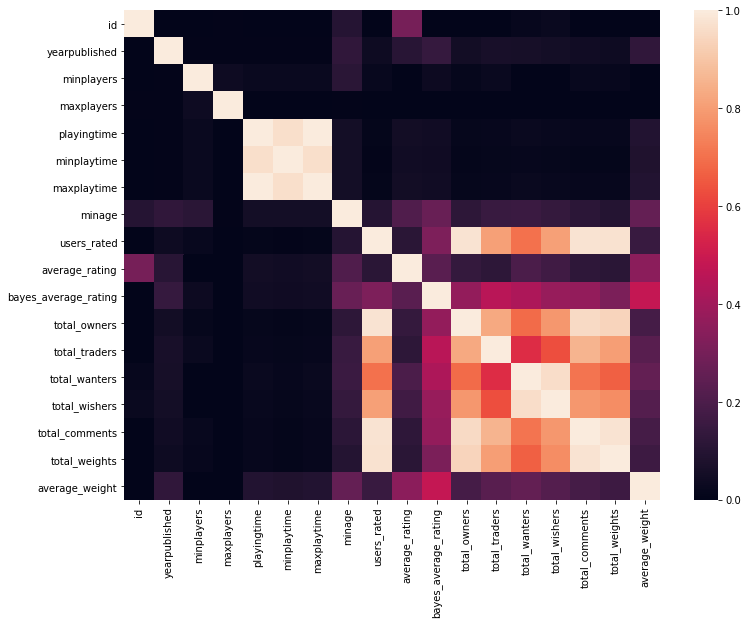

In [10]:
corrmat = games.corr()

fig = plt.figure(figsize=(12, 9))

sb.heatmap(corrmat, vmax=1, vmin=0)

plt.show()

> From the above heat map we can see that avarage rating is correlated with many but we want to remove ID and some other 
columns because they do not provide any useful information to our model

In [11]:
columns = games.columns.to_list()
columns = [c for c in columns if c not in ['id', 'bayes_average_rating', 'type', 'name', 'average_rating']]

> in the above cell we have reduced the unwanted columns from the data set

In [12]:
target = 'average_rating'

> Our target or the output colum is the <b> 'average_rating'

### Now we are going to split the dataset into <u> training </u> and  <u> test </u> datasets
> Generate training set

In [13]:
train = games.sample(frac=0.8, random_state=1)

In [14]:
test = games.loc[~games.index.isin(train.index)]

In [15]:
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


### Now we are going to import the Linear Regression model to this
> Linear Regression model from scikit learn

In [16]:
from sklearn.linear_model import LinearRegression

# Instantiating the model
linear_reg = LinearRegression()

In [28]:
print(train[columns].shape)
print(train[target].shape)

(45515, 15)
(45515,)


> Now we have instantiated the Regression model and our training set dimensions are seems to be ok<br>
> Now lets give our training and test data to the model

In [21]:
linear_reg.fit(train[columns], train[target])

LinearRegression()

> That means our model has learned from the training <br>
> Let us check for predictions

In [24]:
predictions = linear_reg.predict(test[columns])

> We got our predictions and now we will use sklearn mean quared error class to get the total error

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(predictions, test[target])

2.0787752049695

> We got the error of <b> 2.0788 </b> which is ok for a linear model<br><br>
> Lets try a non linear mode and check its peformance

In [30]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(min_samples_leaf=10)

> Let us fit our training data to the Random Forest

In [34]:
random_forest_reg.fit(train[columns], train[target])

RandomForestRegressor(min_samples_leaf=10)

In [35]:
predictions_non_linear = random_forest_reg.predict(test[columns])

In [36]:
mean_squared_error(predictions_non_linear, test[target])

1.4494761308633757

> We have got our model improved the error is <b> 1.4495 </b> which is less than previous error of 2.0788

### Wow we have made our model and got the results, now we'll see some actual values of prediction

In [43]:
import random

In [62]:
i = random.randint(0, int(test.shape[0]) - 1)
pred_linear = linear_reg.predict(test[columns].iloc[i].values.reshape(1, -1))
pred_non_linear = random_forest_reg.predict(test[columns].iloc[i].values.reshape(1, -1))
print('Linear_Prediction : ' + str(float(pred_linear)) + ' Actual value : ' + str(test[target].iloc[i]))
print('Non_Linear_Prediction : ' + str(float(pred_non_linear)) + ' Actual value : ' + str(test[target].iloc[i]))

Linear_Prediction : 6.1521410903926075 Actual value : 4.70833
Non_Linear_Prediction : 4.724178488173043 Actual value : 4.70833
